In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
stock_data = pd.read_csv("https://stooq.com/q/d/l/?s=cdr&d1=20190101&d2=20220201&i=d")
stock_data.head()

,Date,Open,High,Low,Close,Volume
0,2019-01-02,140.66,146.36,137.46,146.07,203661
1,2019-01-03,145.88,145.88,142.20,143.17,231128
2,2019-01-04,143.17,145.88,143.17,145.78,169481
3,2019-01-07,147.04,149.55,146.56,148.69,194329
4,2019-01-08,149.45,151.58,147.04,148.59,287699


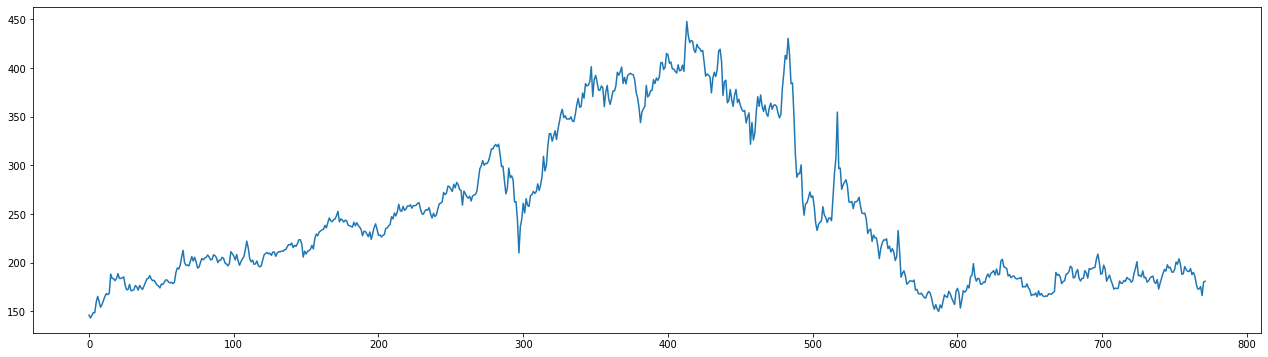

In [4]:
stock_data.Close.plot(figsize=(22,6))

In [8]:
close_data = stock_data[["Close"]].values
print(close_data[:5])

[[146.07]
 [143.17]
 [145.78]
 [148.69]
 [148.59]]


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaler = scaler.fit(close_data)

X = data_scaler.transform(close_data)
print(X[:5])

[[0.00951662]
 [0.        ]
 [0.00856496]
 [0.0181144 ]
 [0.01778624]]


In [ ]:
plt.plot(X)

In [12]:
time_steps = 10 # liczba próbek historycznych względem probki N
number_of_rows = len(X)

X_samples = []
y_samples = []

for i in range(time_steps, number_of_rows):
  x_sample = X[i-time_steps:i]
  y_sample = X[i]

  X_samples.append(x_sample)
  y_samples.append(y_sample)

In [20]:
X_data = np.array(X_samples)
print(X_data.shape)

y_data = np.array( y_samples )
print(y_data.shape)

(762, 10, 1)
(762, 1)


In [22]:
test_records = int(len(X_data)*.15)
print(test_records)

# podział danych
X_train = X_data[:-test_records]
X_test = X_data[-test_records:]

y_train = y_data[:-test_records]
y_test = y_data[-test_records:]

114


In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [25]:
model = Sequential()

model.add(LSTM(10, activation="relu", input_shape=(time_steps,1), return_sequences=True ))

model.add(LSTM(5, activation="relu", input_shape=(time_steps,1), return_sequences=True ))

model.add(LSTM(5, activation="relu", return_sequences=False ))

model.add(Dense(1))

In [26]:
model.compile(optimizer="adam", loss="mae")

In [27]:
result = model.fit(X_train, y_train, epochs=150)

Epoch 1/150
21/21 [==============================] - 6s 14ms/step - loss: 0.3831
Epoch 2/150
21/21 [==============================] - 0s 13ms/step - loss: 0.3283
Epoch 3/150
21/21 [==============================] - 0s 14ms/step - loss: 0.2610
Epoch 4/150
21/21 [==============================] - 0s 14ms/step - loss: 0.1861
Epoch 5/150
21/21 [==============================] - 0s 14ms/step - loss: 0.1213
Epoch 6/150
21/21 [==============================] - 0s 14ms/step - loss: 0.0737
Epoch 7/150
21/21 [==============================] - 0s 14ms/step - loss: 0.0650
Epoch 8/150
21/21 [==============================] - 0s 14ms/step - loss: 0.0633
Epoch 9/150
21/21 [==============================] - 0s 14ms/step - loss: 0.0601
Epoch 10/150
21/21 [==============================] - 0s 14ms/step - loss: 0.0561
Epoch 11/150
21/21 [==============================] - 0s 14ms/step - loss: 0.0538
Epoch 12/150
21/21 [==============================] - 0s 14ms/step - loss: 0.0521
Epoch 13/150
21/21 [=====

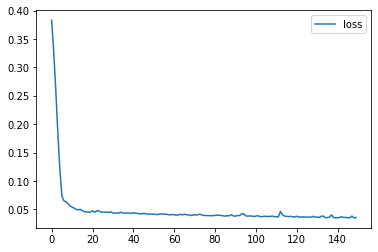

In [28]:
pd.DataFrame(result.history).plot()

In [29]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 6ms/step - loss: 0.0213


0.021335706114768982

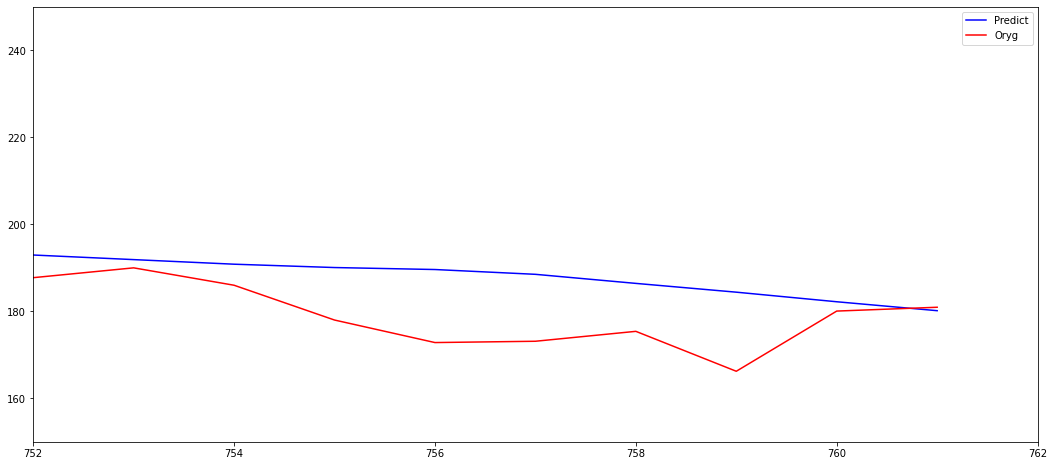

In [37]:
train_predict =  data_scaler.inverse_transform( model.predict(X_train) )
test_predict = data_scaler.inverse_transform( model.predict(X_test) )
close_data_predict = np.append(train_predict, test_predict)

plt.figure(figsize=(18,8))
plt.plot(close_data_predict, color='b', label='Predict')
plt.plot(close_data[time_steps:], color='r', label='Oryg' )
plt.xlim( len(X_data)-time_steps, len(X_data) )
plt.ylim( 150, 250 )

plt.legend();

In [44]:
# predycja na "dzień po"
last10d = data_scaler.transform(close_data[-time_steps:])
x = last10d.reshape( (1,)+last10d.shape )

In [47]:
data_scaler.inverse_transform( model.predict(x) )

array([[178.25294]], dtype=float32)

In [48]:
185.8 / 178.2

1.042648709315376